Importing all necessary libraries.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf


Installing library useful for this task and then importing this library.

In [3]:
%pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 2.0 MB/s eta 0:00:05
   - -------------------------------------- 0.4/9.8 MB 6.4 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/9.8 MB 8.3 MB/s eta 0:00:02
   ------ --------------------------------- 1.6/9.8 MB 10.2 MB/s eta 0:00:01
   ---------- ----------------------------- 2.6/9.8 MB 12.6 MB/s eta 0:00:01
   --------------- ------------------------ 3.8/9.8 MB 15.2 MB/s eta 0:00:01
   --------------------- ------------------ 5.3/9.8 MB 17.8 MB/s eta 0:00:01
   ------------------------- -------------- 6.4/9.8 MB 18.5 MB/s eta 0:00:01
   ----------------------------------- ---- 8.8/9.8 MB 22.6 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 23.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/233.9 kB ? eta -:--:--
   --------------------------------------- 233.9/233.9 kB 14.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Loading the dataset.

In [2]:
data = pd.read_csv('data_thefts.csv')
data_dict = open('data_thefts_columns.names').read()

data.head()

,Unnamed: 0,robbbPerPop,pctWhite,kidsBornNevrMarr,pctKidsBornNevrMarr,pctUsePubTrans,pctBlack,pctKids2Par,pctFemDivorc,numForeignBorn,pctAllDivorc,pctForeignBorn,pct2Par,popDensity,pct12.17w2Par,persUrban,pctMaleDivorc,pctImmig.10
0,1,8.20,91.78,31,0.36,9.63,1.37,90.17,5.22,1277,4.47,10.66,91.43,1845.9,95.81,11980,3.67,3.30
1,2,21.26,95.57,43,0.24,3.84,0.80,85.33,6.45,1920,5.42,8.30,86.91,2186.7,86.46,23123,4.23,1.87
2,3,154.95,94.33,164,0.88,4.37,0.74,78.85,14.76,1468,12.55,5.00,78.54,2780.9,75.72,29344,10.10,1.78
3,4,57.86,97.35,561,3.84,3.31,1.70,62.36,14.47,339,12.91,2.04,64.02,3217.7,67.43,0,10.98,0.31
4,5,32.04,89.16,402,4.70,0.38,0.53,55.20,11.64,196,9.73,1.74,58.59,974.2,79.17,0,7.51,1.22


In [3]:
descriptive_stats = data.describe()
print(descriptive_stats)

        Unnamed: 0  robbbPerPop     pctWhite  kidsBornNevrMarr  \
count  2213.000000  2213.000000  2213.000000       2213.000000   
mean   1107.724808   162.602576    84.009625       2107.273385   
std     639.534290   234.539147    16.396434      14610.602051   
min       1.000000     0.000000     2.680000          0.000000   
25%     554.000000    27.640000    76.370000        147.000000   
50%    1108.000000    74.780000    90.350000        352.000000   
75%    1661.000000   187.160000    96.230000       1030.000000   
max    2215.000000  2264.130000    99.630000     527557.000000   

       pctKidsBornNevrMarr  pctUsePubTrans     pctBlack  pctKids2Par  \
count          2213.000000     2213.000000  2213.000000  2213.000000   
mean              3.110474        3.040533     9.308098    71.243502   
std               3.124172        4.914354    14.221291    12.036921   
min               0.000000        0.000000     0.000000    18.300000   
25%               1.070000        0.360000   

 Check if the variables that are in % do not have values outside 0-100% range. 
 Nothing stands out of range.

In [4]:
percent_columns = [
    'pctWhite', 'pctUsePubTrans', 'pctBlack', 'pctKids2Par', 
    'pctFemDivorc', 'pctAllDivorc', 'pctForeignBorn', 
    'pct2Par', 'pctKidsBornNevrMarr', 
    'pctMaleDivorc', 'pct12.17w2Par', 'pctImmig.10'
] 
out_of_range = data[(data[percent_columns] < 0) | (data[percent_columns] > 100)]
print(out_of_range)
                    

      Unnamed: 0  robbbPerPop  pctWhite  kidsBornNevrMarr  \
0            NaN          NaN       NaN               NaN   
1            NaN          NaN       NaN               NaN   
2            NaN          NaN       NaN               NaN   
3            NaN          NaN       NaN               NaN   
4            NaN          NaN       NaN               NaN   
...          ...          ...       ...               ...   
2208         NaN          NaN       NaN               NaN   
2209         NaN          NaN       NaN               NaN   
2210         NaN          NaN       NaN               NaN   
2211         NaN          NaN       NaN               NaN   
2212         NaN          NaN       NaN               NaN   

      pctKidsBornNevrMarr  pctUsePubTrans  pctBlack  pctKids2Par  \
0                     NaN             NaN       NaN          NaN   
1                     NaN             NaN       NaN          NaN   
2                     NaN             NaN       NaN          Na

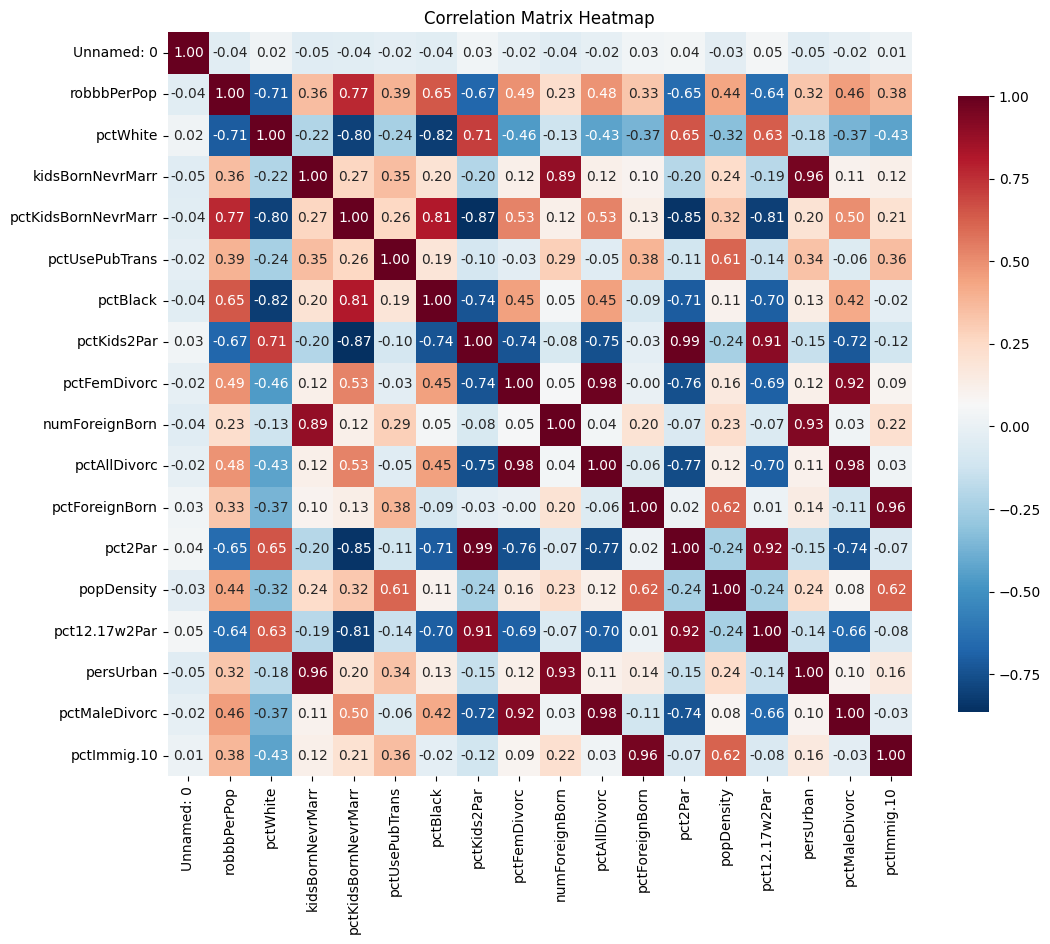

In [13]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdBu_r', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.show()

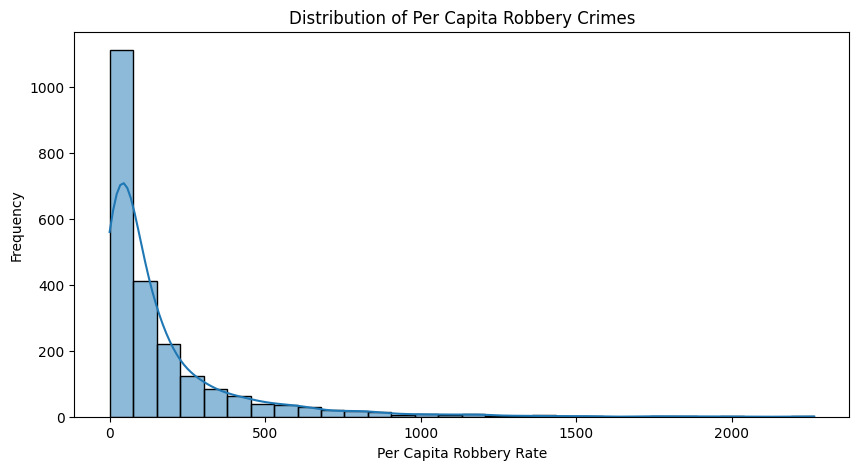

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(data['robbbPerPop'], bins=30, kde=True)
plt.title('Distribution of Per Capita Robbery Crimes')
plt.xlabel('Per Capita Robbery Rate')
plt.ylabel('Frequency')
plt.show()

It shows, that most of the places have lower rate of robbery rate, which would indicate, that robberies are concentrated in few areas.

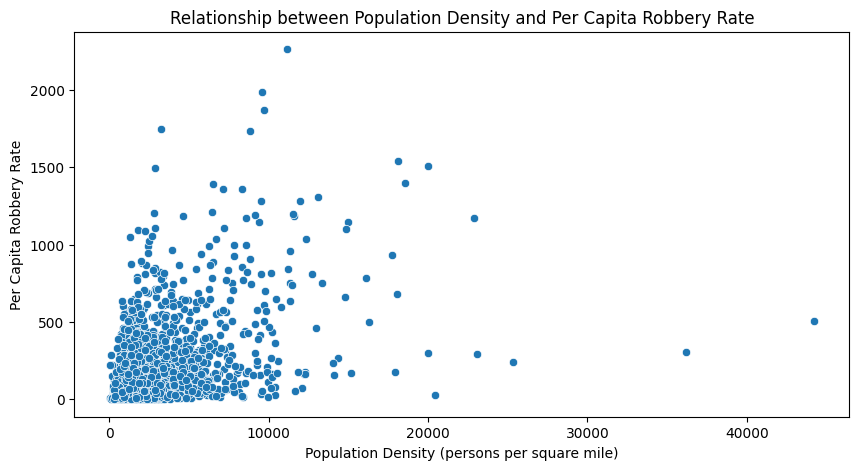

In [7]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='popDensity', y='robbbPerPop')
plt.title('Relationship between Population Density and Per Capita Robbery Rate')
plt.xlabel('Population Density (persons per square mile)')
plt.ylabel('Per Capita Robbery Rate')
plt.show()

Most of the points are in areas of lower density and lower number of robberies. As population density increases, there is greater variance in robbery rates, but no clear linear relationship. There are some outliers, and they should be analyze separately.

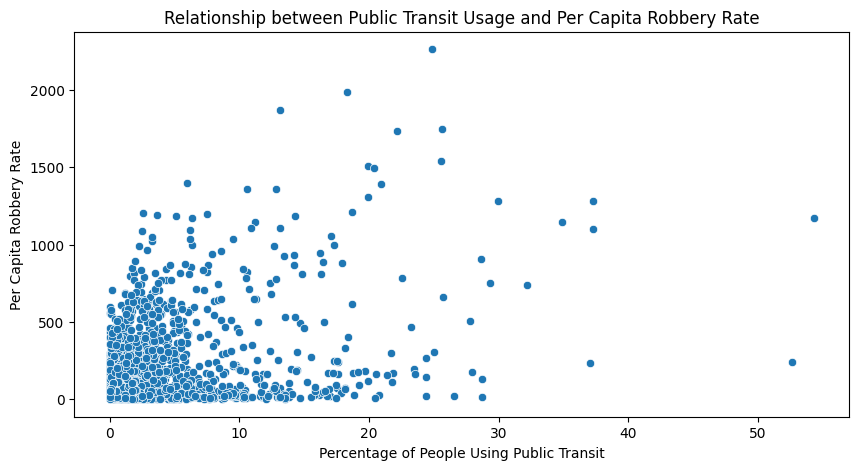

In [8]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='pctUsePubTrans', y='robbbPerPop')
plt.title('Relationship between Public Transit Usage and Per Capita Robbery Rate')
plt.xlabel('Percentage of People Using Public Transit')
plt.ylabel('Per Capita Robbery Rate')
plt.show()

It shows, that most areas have lower percentage of people using public transport and also lower robbery rate. There are also outliers(for example robber rate higher than 2000 and also percentage of people using public transport almost 30%) that should be analyzed separately.

In [9]:
model_full = smf.ols(formula='robbbPerPop ~ popDensity + Q("pctImmig.10") + pctAllDivorc', data=data).fit()
print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:            robbbPerPop   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     502.4
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          7.47e-249
Time:                        09:57:40   Log-Likelihood:                -14642.
No. Observations:                2213   AIC:                         2.929e+04
Df Residuals:                    2209   BIC:                         2.931e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -307.2707     14.587  

C 1.Does the model make sense overall? 
Moderately yes. The R-squared value is 0.406, which means that 40.6% of the variance in robbbPerPop is explained by predictors. 
2.Is it better than a model containing just a constant?
Yes, because R-squared is above zero.
3.Which variables are statistically significant at 5% level? 
All of them in my model, because their p-value is below 0.05
4.Select three variables and try to interpret their coefficients. 
interecept(-307.2707) - it is important for structuring the linear model.
popDensity(0.0213) - for each additional unit increase in population density, model predicts a 0.0213 increase in robbbPerPop.
pctAllDivorc(34.9294) - for each percentage point increase in divorce rate, robbbPerPop is expected to increase by 34.9294.This suggests strong relationship between divorce rate and outcome.

D 1.Heteroskedascticity

In [11]:
y = data['robbbPerPop']
X = data[['popDensity', 'pctImmig.10', 'pctAllDivorc']]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results_robust = model.fit(cov_type='HC3')
print(results_robust.summary())

                            OLS Regression Results                            
Dep. Variable:            robbbPerPop   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     186.4
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          9.67e-108
Time:                        10:57:09   Log-Likelihood:                -14642.
No. Observations:                2213   AIC:                         2.929e+04
Df Residuals:                    2209   BIC:                         2.931e+04
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -307.2707     18.545    -16.569   

2.Calculating VIF (Variance Inflation Factor)

In [12]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

        Feature        VIF
0         const  14.380939
1    popDensity   1.652013
2   pctImmig.10   1.627581
3  pctAllDivorc   1.019800


Result - VIF for intercept is 14.380939 = very high.
But, VIF for predictors is very low(< 5), which indicates that there is no multicollinearity and therefore this model is reliable.

E.Further considerations and potential ethical concerns.
Socially sensitive variables like pctAllDivorc should be handled with great care to avoid misinterpretation and/or bias.
Also, I should have chosen a different variable than pctAllDivorc, because it has too high correlation with robbbPerPop.



